<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analytics/blob/main/SecondCarInfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset/Car_details.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [ ]:
df.shape

(8127, 13)

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8127 non-null   object 
 1   year           8127 non-null   int64  
 2   selling_price  8127 non-null   int64  
 3   km_driven      8127 non-null   int64  
 4   fuel           8127 non-null   object 
 5   seller_type    8127 non-null   object 
 6   transmission   8127 non-null   object 
 7   owner          8127 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7912 non-null   object 
 11  torque         7905 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.5+ KB


In [ ]:
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

In [ ]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
dropna = df.dropna()
dropna.shape
df = dropna

In [ ]:
# menghapus string kmpl di dalam kolom mileage
df["mileage"] = df["mileage"].replace(" kmpl","", regex=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [ ]:
# menghapus string km/kg di dalam kolom mileage
df["mileage"] = df["mileage"].replace(" km/kg","", regex=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52,1498,103.52,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78.00,1497,78,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90.00,1396,90,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.20,1298,88.2,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,81.86,1197,81.86,5.0


In [ ]:
# menghapus string CC di dalam kolom engine
df["engine"] = df["engine"].replace("CC","", regex=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86 bhp,113.75nm@ 4000rpm,5.0


In [ ]:
# menghapus string bhp di kolom max_power
df["max_power"] = df["max_power"].replace("bhp","", regex=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5.0


In [ ]:
df.nunique()

name             1982
year               27
selling_price     670
km_driven         897
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         320
torque            441
seats               9
dtype: int64

In [ ]:
# menhapus kolom torque
df.drop(columns=["torque"], inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
1,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0


In [ ]:
# melihat jumlah penjualan mobil tahun 2014
df[df["year"]==2014]["year"].value_counts()

year
2014    619
Name: count, dtype: int64

In [ ]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

<Axes: xlabel='year', ylabel='Density'>

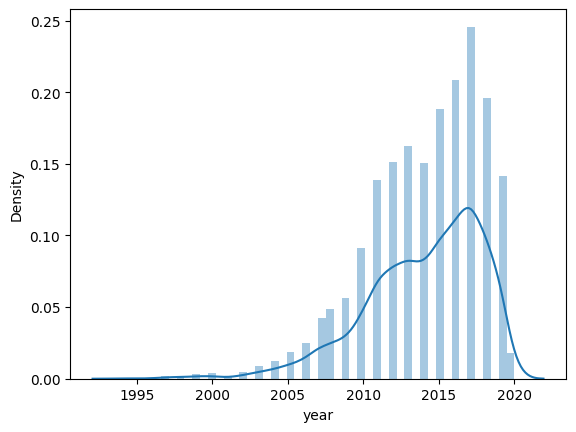

In [ ]:
# melihat sebaran data tahu
sns.distplot(df['year'])

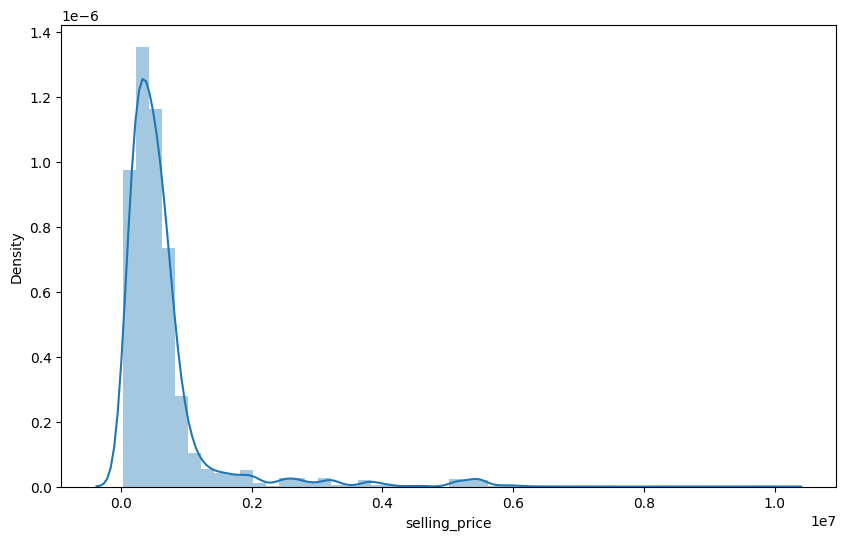

In [ ]:
# meliihat sebaran data harga kendaraan
plt.figure(figsize=(10,6))
sns.distplot(df['selling_price'])
plt.show()

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

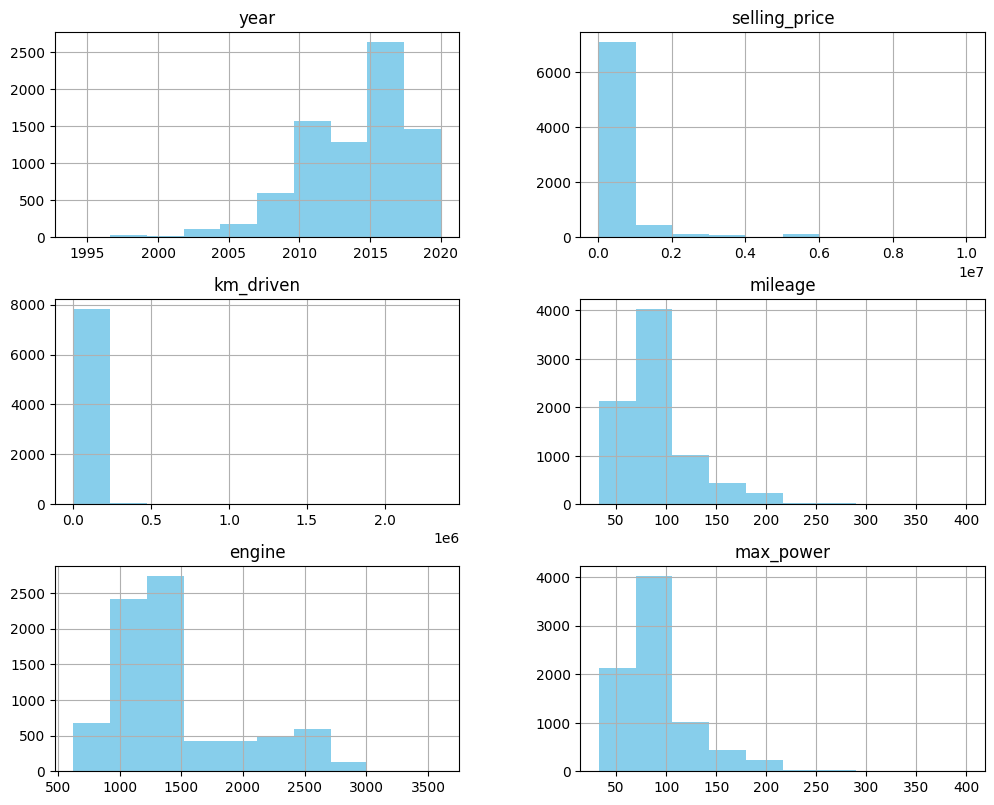

In [ ]:
# melihat sebaran data continues dengan hist plot
df.hist(figsize=(12, 20), layout=(6, 2), color='skyblue')

In [ ]:
# mengganti tipe data seats jadi object
df['seats'] = df['seats'].astype('object')

Text(0.5, 1.0, 'Sebaran penjualan mobil second berdasarkan tahun produksi')

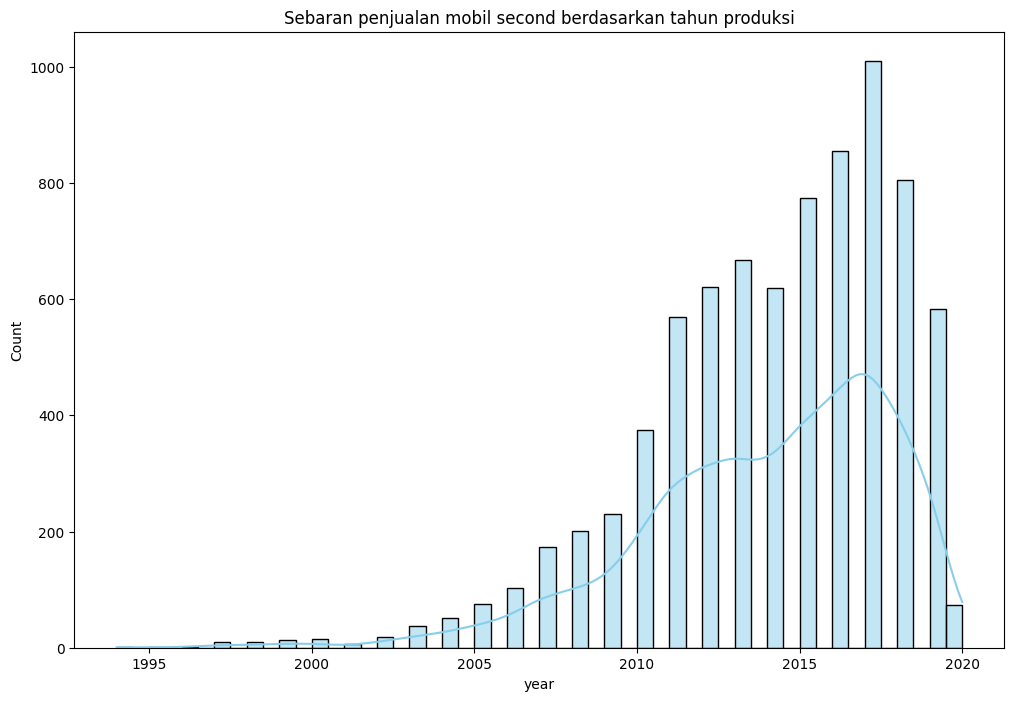

In [ ]:
# melihat penjualan mobil bersarkan tahun produksinya
plt.figure(figsize=(12, 8))
sns.histplot(df['year'], color='skyblue', kde=True)
plt.title('Sebaran penjualan mobil second berdasarkan tahun produksi')

In [ ]:
df = df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Dataset/Car_details_clean.csv')